In [2]:
from db_thread_detail_data import execute_sql_query
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import os
import sys
import numpy as np
import seaborn as sns
import locale

# ロケールを日本語に固定
locale.setlocale(locale.LC_TIME, 'ja_JP.UTF-8')

'ja_JP.UTF-8'

In [3]:
NANG = "livegalileo"
NANU = "liveuranus"
KENMO = "news1"

board = KENMO

view_name = "view_" + board
day = f"{view_name}_daily_comment_count"
hour = f"{view_name}_hourly_comment_count"
id = f"{view_name}_daily_unique_id_percentage"

sql = f'select * from {day} WHERE date >= "2000-01-01"'
dailycount = execute_sql_query(sql)


In [4]:
dailycount

[('2022-07-07', 2),
 ('2022-07-08', 185),
 ('2022-07-09', 65),
 ('2022-07-10', 74),
 ('2022-07-11', 83),
 ('2022-07-12', 92),
 ('2022-07-13', 52),
 ('2022-07-14', 55),
 ('2022-07-15', 90),
 ('2022-07-16', 57),
 ('2022-07-17', 103),
 ('2022-07-18', 150),
 ('2022-07-19', 77),
 ('2022-07-20', 165),
 ('2022-07-21', 120),
 ('2022-07-22', 179),
 ('2022-07-23', 170),
 ('2022-07-24', 145),
 ('2022-07-25', 87),
 ('2022-07-26', 274),
 ('2022-07-27', 139),
 ('2022-07-28', 119),
 ('2022-07-29', 205),
 ('2022-07-30', 3882),
 ('2022-07-31', 3475),
 ('2022-08-01', 3819),
 ('2022-08-02', 3960),
 ('2022-08-03', 4516),
 ('2022-08-04', 3896),
 ('2022-08-05', 3263),
 ('2022-08-06', 2799),
 ('2022-08-07', 2999),
 ('2022-08-08', 2551),
 ('2022-08-09', 2479),
 ('2022-08-10', 1873),
 ('2022-08-11', 2050),
 ('2022-08-12', 2433),
 ('2022-08-13', 1629),
 ('2022-08-14', 1829),
 ('2022-08-15', 2054),
 ('2022-08-16', 2266),
 ('2022-08-17', 3373),
 ('2022-08-18', 1992),
 ('2022-08-19', 2721),
 ('2022-08-20', 2372),


2023-05-15 09:12:38.864 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-05-15 09:12:38.865 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


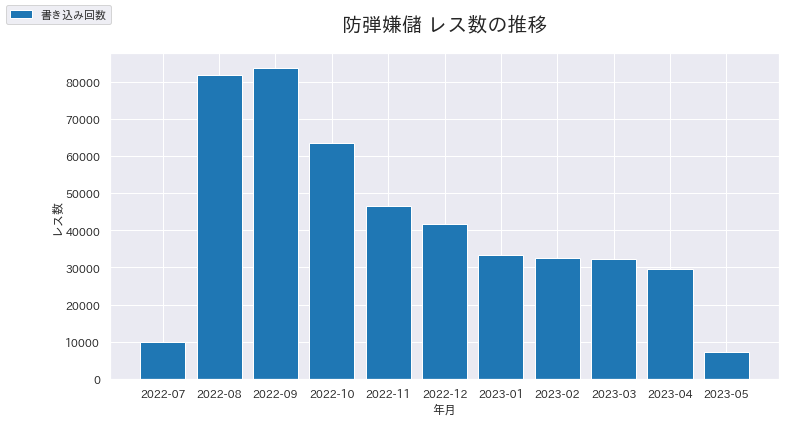

In [6]:
data = dailycount
sns.set(font=['IPAexGothic'])

df = pd.DataFrame(data, columns=['date', 'sum_comment'])
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

monthly_data = df.groupby('month')['sum_comment'].sum()

fig, ax = plt.subplots(figsize=(12,6))

# 書き込み件数の棒グラフを描画する
ax.bar(monthly_data.index.astype(str), monthly_data, color='tab:blue', label='書き込み回数')

# x軸のラベルを設定する
ax.set_xlabel('年月')

# y軸のラベルを設定する
ax.set_ylabel('レス数')

# グラフのタイトルを設定する
plt.title('防弾嫌儲 レス数の推移', fontsize=20, y=1.05)

# 凡例を表示する
fig.legend(loc='upper left')

# グラフを表示する
plt.show()

In [7]:
sql = f"""SELECT strftime("%Y-%m-01", comment_time) AS comment_date, COUNT(DISTINCT post_id) AS total_post_id 
FROM db_{KENMO} 
GROUP BY comment_date
"""
id_count = execute_sql_query(sql)[1:]
id_count

[('2022-07-01', 2687),
 ('2022-08-01', 13550),
 ('2022-09-01', 17215),
 ('2022-10-01', 12480),
 ('2022-11-01', 9921),
 ('2022-12-01', 9244),
 ('2023-01-01', 8476),
 ('2023-02-01', 7818),
 ('2023-03-01', 6901),
 ('2023-04-01', 7834),
 ('2023-05-01', 2240)]

In [8]:
# id_countから書き込み数のみのリストを取得
count_list = [x[1] for x in id_count]

# 平均を求める
avg_count = np.mean(count_list)

print("平均値:", avg_count / 30)



平均値: 298.07878787878786


2023-05-15 09:13:48.651 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-05-15 09:13:48.653 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-05-15 09:13:48.669 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-05-15 09:13:48.674 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


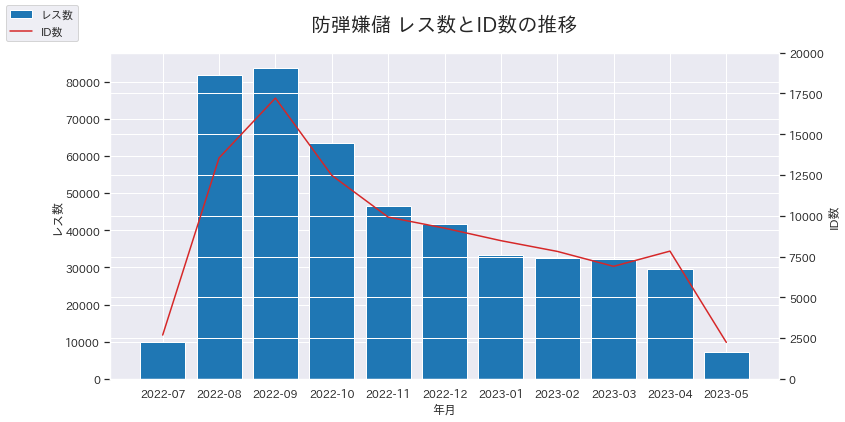

In [10]:
# レス数のデータをDataFrameに変換する
df1 = pd.DataFrame(dailycount, columns=['date', 'sum_comment'])
df1['month'] = pd.to_datetime(df1['date']).dt.to_period('M')
monthly_data = df1.groupby('month')['sum_comment'].sum()

# ID数のデータをDataFrameに変換する
df2 = pd.DataFrame(id_count, columns=['date', 'id_count'])
df2['month'] = pd.to_datetime(df2['date']).dt.to_period('M')
monthly_id_count = df2.groupby('month')['id_count'].sum()

# グラフを描画する
sns.set(font=['IPAexGothic'])
fig, ax1 = plt.subplots(figsize=(12,6))

# レス数の棒グラフを描画する
ax1.bar(monthly_data.index.astype(str), monthly_data, color='tab:blue', label='レス数')

# x軸のラベルを設定する
ax1.set_xlabel('年月')

# y軸のラベルを設定する
ax1.set_ylabel('レス数')

# グラフのタイトルを設定する
plt.title('防弾嫌儲 レス数とID数の推移', fontsize=20, y=1.05)

# ID数の折れ線グラフを描画する
ax2 = ax1.twinx()
ax2.plot(monthly_id_count.index.astype(str), monthly_id_count, color='tab:red', label='ID数')
ax2.set_ylabel('ID数')
ax2.set_ylim(0, 20000)

# 凡例を表示する
fig.legend(loc='upper left')

# グラフを表示する
plt.show()


2023-05-15 09:14:56.920 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-05-15 09:14:56.923 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


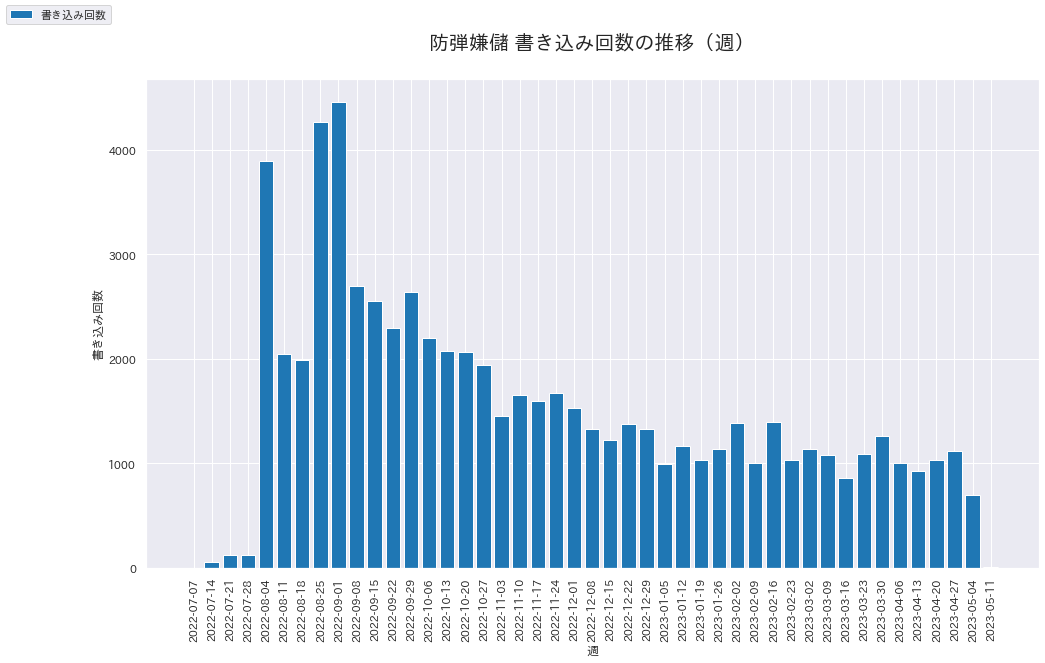

In [11]:
data = dailycount
sns.set(font=['IPAexGothic'])

df = pd.DataFrame(data, columns=['date', 'sum_comment'])
df['week'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')  # 週を表す文字列を作成
weekly_data = df.groupby('week')['sum_comment'].sum()

fig, ax = plt.subplots(figsize=(16,9))

# 書き込み件数の棒グラフを描画する
ax.bar(weekly_data.index[::7], weekly_data[::7], color='tab:blue', label='書き込み回数')

# x軸のラベルを設定する
ax.set_xlabel('週')

# y軸のラベルを設定する
ax.set_ylabel('書き込み回数')

# グラフのタイトルを設定する
plt.title('防弾嫌儲 書き込み回数の推移（週）', fontsize=20, y=1.05)

# x軸の表示を縦書きにする
plt.xticks(rotation=90)

# 凡例を表示する
fig.legend(loc='upper left')

# グラフを表示する
plt.show()


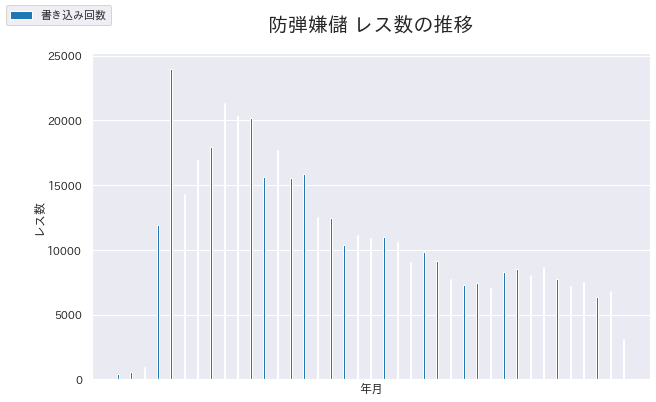

In [95]:
data = dailycount
sns.set(font=['IPAexGothic'])

df = pd.DataFrame(data, columns=['date', 'sum_comment'])

fig, ax = plt.subplots(figsize=(10,6))

# 週ごとにレス数を集計する
df['date'] = pd.to_datetime(df['date'])
weekly_data = df.resample('W-MON', on='date').sum()
weekly_data['date'] = weekly_data.index

# 1ヶ月ごとにラベルを設定する
labels = weekly_data['date'].dt.strftime('%Y-%m').unique()
label_index = np.arange(len(labels))
plt.xticks(label_index, labels, rotation='vertical')

# 書き込み件数の棒グラフを描画する
ax.bar(weekly_data.index, weekly_data['sum_comment'], color='tab:blue', label='書き込み回数')

# x軸のラベルを設定する
ax.set_xlabel('年月')

# y軸のラベルを設定する
ax.set_ylabel('レス数')

# グラフのタイトルを設定する
plt.title('防弾嫌儲 レス数の推移', fontsize=20, y=1.05)

# 凡例を表示する
fig.legend(loc='upper left')

# グラフを表示する
plt.show()


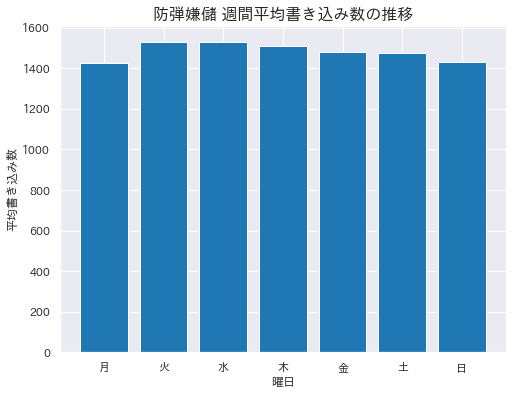

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = dailycount
df = pd.DataFrame(data, columns=['date', 'sum_comment'])
df['date'] = pd.to_datetime(df['date'])

# 曜日を表すカラムを追加する（0: 月曜日, 1: 火曜日, ..., 6: 日曜日）
df['weekday'] = df['date'].dt.weekday

# 曜日ごとに平均書き込み数を計算する
mean_by_weekday = df.groupby('weekday')['sum_comment'].mean()

# グラフを描画する
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(mean_by_weekday.index, mean_by_weekday, color='tab:blue')

# x軸のラベルを設定する
ax.set_xlabel('曜日')
ax.set_xticks(mean_by_weekday.index)
ax.set_xticklabels(['月', '火', '水', '木', '金', '土', '日'])

# y軸のラベルを設定する
ax.set_ylabel('平均書き込み数')

# グラフのタイトルを設定する
ax.set_title('防弾嫌儲 週間平均書き込み数の推移', fontsize=16)

# グラフを表示する
plt.show()


In [13]:
sql = f'select count(*) from db_news1 WHERE name like "%invild data%"'
invilid = execute_sql_query(sql)[0][0]

sql = f'select count(*) from db_news1'
all = execute_sql_query(sql)[0][0]


#sql = 'SELECT thread_title, COUNT(*) as cnt FROM db_news1 WHERE name LIKE "%invild data%" GROUP BY thread_key order by cnt desc'
#execute_sql_query(sql)
#100 - round((invilid / all) * 100, 3)
#捕捉レコード 82.274%
all

562083

In [14]:

sql = f'SELECT comment_time, post_id, count(post_id) as cnt FROM db_news1 group by post_id order by cnt desc limit 11'
id_res_rank = execute_sql_query(sql)[1:]
id_res_rank

[('2022-08-25 23:52:30.380000', '050URVpo', 2272),
 ('2022-08-27 03:14:06.120000', 'LQOX4zXW', 610),
 ('2022-08-04 23:49:13.590000', '4Ipydosh', 597),
 ('2022-08-19 12:03:57.620000', 'j/XEkAcs', 418),
 ('2022-08-17 22:22:37.230000', 'z77O12bv', 403),
 ('2022-08-21 19:49:29.670000', 'BsmaJ0dl', 322),
 ('2022-08-26 00:24:23.370000', 'S9ojenFt', 320),
 ('2022-08-16 11:57:54.930000', 'f/N8/Nw1', 288),
 ('2022-08-27 18:31:49.970000', 'z5l6AqW4', 267),
 ('2022-08-19 15:36:36.550000', 'RdxGR71f', 252)]

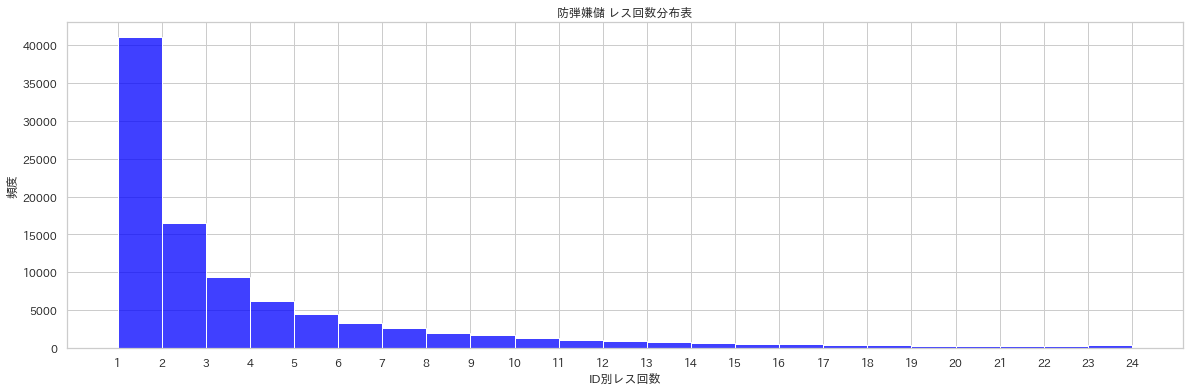

,度数,階級
0,41006,1~2
1,16476,2~3
2,9436,3~4
3,6200,4~5
4,4471,5~6
5,3351,6~7
6,2593,7~8
7,2029,8~9
8,1683,9~10
9,1342,10~11


In [15]:
sql = f'SELECT count(post_id) as cnt FROM db_news1 group by post_id order by cnt desc'

# 配列dataの度数分布表を作成する
data = execute_sql_query(sql)[1:]
data = np.ravel(data)
bins = range(1, 25, 1)
hist, edges = np.histogram(data, bins=bins)
df = pd.DataFrame({'度数': hist, '階級': [f"{int(edges[i])}~{int(edges[i+1])}" for i in range(len(edges)-1)]})

# 可視化する
plt.figure(figsize=(20, 6))
sns.set(style='whitegrid', font='IPAexGothic')
sns.histplot(data, bins=bins, kde=False, color='blue')
plt.title('防弾嫌儲 レス回数分布表')
plt.xlabel('ID別レス回数')
plt.ylabel('頻度')
plt.xticks(bins)
plt.show()
df

書き込み回数ランキング

1位　63回　2023-03-27　「母親に山上様の素晴らしさを説いたら引かれた」
2位　60回　2022-09-16　「おっぱい」と20回書き込み
3位　48回　2023-03-25　「あーちーちーあーｔ−」

In [137]:
sql = f'SELECT thread_title, comment, comment_time, count(*) FROM db_news1 where post_id = "050URVpo"'
execute_sql_query(sql)

[('苦手な言葉を全て「ぴよぴよ」に変換\u3000メンタルの弱い社長が開発した拡張機能が無料公開 [30ﾚea12★]',
  ' sssp://img.5ch.net/ico/u_ona.gif  アプリ開発ベンチャーのbondavi（神奈川県横浜市）は8月25日、Webブラウザに表示される苦手な言葉を「ぴよぴよ＋ひよこの絵文字」に変換する「ひよこフィルター」を公開した。    ネット上の誹謗中傷から利用者を守るために無償公開するとしている。      （全文）  https://www.itmedia.co.jp/news/articles/2208/25/news098.html      https://image.itmedia.co.jp/news/articles/2208/25/ts1532_piyopiyo03.jpg',
  '2022-08-25 23:52:30.380000',
  2272)]

In [121]:
sql = f'SELECT thread_title, comment_time, comment FROM db_news1 where post_id = "Z9FMudKs"'
execute_sql_query(sql)



[('「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-16 21:18:25.440000',
  ' おっぱい'),
 ('「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-16 21:18:40.790000',
  ' おっぱい'),
 ('「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-16 21:18:48.640000',
  ' いっぱい'),
 ('「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-16 21:18:58.550000',
  ' 夢いっぱい'),
 ('「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-16 21:19:09.330000',
  ' 友達探しに'),
 ('「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-16 21:19:19.500000',
  ' 行こおよお'),
 ('「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-16 21:19:40.900000',
  ' その名は'),
 ('「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-16 21:19:50.210000',
  ' おっぱい'),
 ('「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-16 21:20:48.840000',
  ' おっぱい'),
 ('「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-16 21:20:5

In [122]:
sql = f'SELECT thread_title, comment_time, comment FROM db_news1 where post_id = "Aleh363v0"'
execute_sql_query(sql)

[('ヘッドラインニュース [f8bc2e-L1★]',
  '2023-03-25 10:00:01.390000',
  ' 【川内原発運転延長】県専門委分科会の「適正」判断委員から「電力会社の文章」と厳しい指摘が…「大きな問題ない」と許容する声も  https://373news.com/_news/storyid/172629/    ベートーベンはB型肝炎を患っていた遺伝子解析で新事実明らかに  https://sputniknews.jp/20230325/b-15437788.html    日ロサケ・マス漁業交渉が妥結 4月10日に操業開始へ 漁獲量は前年と同じ2050トンで合意 北海道周辺 （北海道放送）  https://www.hbc.co.jp/news/a0b4ce6b3ca0a95741173e39662a0032.html    Adobe、画像生成AI「Adobe Firefly」発表商業利用に特化  https://www.itmedia.co.jp/business/articles/2303/24/news210.html'),
 ('スレ立てるまでもない雑談スレ [2ﾚ2794★]', '2023-03-25 14:18:47.190000', ' 防弾なんＵもあるぞ'),
 ('スレ立てるまでもない雑談スレ [2ﾚ2794★]', '2023-03-25 14:58:08.250000', ' 部スレが大量に立ってんな'),
 ('スレ立てるまでもない雑談スレ [2ﾚ2794★]',
  '2023-03-25 15:08:58.650000',
  ' &gt;&gt;806  何するスレか分からんかったし…'),
 ('エモい画像が集まるスレ [5089★]', '2023-03-25 16:28:49.950000', ' &gt;&gt;306  R.I.P'),
 ('「排泄物放置事件」めぐり立憲民主党を揶揄、ネット投稿者の情報開示命じる…東京地裁 [L4-t5ok★]',
  '2023-03-25 12:03:00.080000',
  ' 飲食店だから廃棄物は置いとけない、は甘えでは？'),
 ('【虚構新聞ではない】岸田がゼレンスキー持ってきたうまい棒の箱の中身『必勝しゃもじ』だった [※tt変更] [0b

In [164]:
sql = f'SELECT name FROM db_news1 where not name like "%invilid%"'
execute_sql_query(sql)

[('アフィサイトへの転載は禁止です。',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invild data',),
 ('invi

In [69]:
import re
from collections import Counter


sql = f'SELECT name FROM db_news1 where name like "%ID:%"'
name = execute_sql_query(sql)

# 正規表現パターンに一致する要素を抽出する
result = []
for tup in name:
    text = tup[0]
    match = re.search(r"\b\w{4}\b", text)
    if match:
        result.append(match.group())

# 上位10件の要素と要素数を表示する
counter = Counter(result)
top10 = counter.most_common(10)

for i, (element, count) in enumerate(top10):
    print(f"{i+1}: {element} ({count})")

1: 0edb (1685)
2: 9365 (355)
3: 6e80 (221)
4: 1b39 (64)
5: 464f (38)
6: bc10 (28)
7: 9c0d (26)
8: 8f65 (25)
9: 6127 (24)
10: 3f42 (21)


In [70]:
sql = f'SELECT name, thread_title, comment_time, comment FROM db_news1 where name like "%ID:0edb%"'
execute_sql_query(sql)

[('</b>【主ID:0edb】<b></b>【総カキコ数:253】<b></b>【忍法帖Lv.34】<b></b>【凶】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-11 09:36:40.430000',
  ' sssp://img.5ch.net/ico/u_chinsyu.gif  おっぱいおっぱい'),
 ('</b>【主ID:0edb】<b></b>【総カキコ数:267】<b></b>【忍法帖Lv.35】<b></b>【凶】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-12 07:51:25.830000',
  ' sssp://img.5ch.net/ico/u_chinsyu.gif  おっぱいおっぱい！'),
 ('</b>【主ID:0edb】<b></b>【総カキコ数:278】<b></b>【忍法帖Lv.36】<b></b>【凶】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-13 07:01:21.670000',
  ' sssp://img.5ch.net/ico/u_chinsyu.gif  おっぱい'),
 ('</b>【主ID:0edb】<b></b>【総カキコ数:284】<b></b>【忍法帖Lv.37】<b></b>【小吉】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-14 06:03:01.190000',
  ' sssp://img.5ch.net/ico/u_chinsyu.gif  おっぱい    ttp://i.imgur.com/7YJIvqh.gif'),
 ('</b>【主ID:0edb】<b></b>【総カキコ数:286】<b></b>【忍法帖Lv.37】<b></b>【大凶】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]'

In [33]:
sql = f'SELECT name, thread_title, comment_time, comment FROM db_news1 where name like "%ID:9365%"'
execute_sql_query(sql)

[('</b>【主ID:9365】<b></b>【総カキコ数:10】<b></b>【忍法帖Lv.1】<b></b>【大晋】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-23 23:08:52.790000',
  ' テス'),
 ('</b>【主ID:9365】<b></b>【総カキコ数:14】<b></b>【忍法帖Lv.55】<b></b>【末吉】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-23 23:17:03.090000',
  ' おっぱい'),
 ('</b>【主ID:9365】<b></b>【総カキコ数:28】<b></b>【忍法帖Lv.50】<b></b>【末吉】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-24 08:30:55.080000',
  ' おっぱい'),
 ('</b>【主ID:9365】<b></b>【総カキコ数:36】<b></b>【忍法帖Lv.50】<b></b>【吉】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-24 16:26:26.030000',
  ' おっぱい'),
 ('</b>【主ID:9365】<b></b>【総カキコ数:87】<b></b>【忍法帖Lv.51】<b></b>【小吉】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-25 06:27:33.820000',
  ' おっぱい'),
 ('</b>【主ID:9365】<b></b>【総カキコ数:97】<b></b>【忍法帖Lv.51】<b></b>【大吉】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-09-25 15:55:34.92000

In [34]:
sql = f'SELECT name, thread_title, comment_time, comment FROM db_news1 where name like "%ID:6e80%"'
execute_sql_query(sql)

[('!774</b>【主ID:6e80】<b></b>【経験値:31】<b></b>【忍法帖Lv.4】<b></b>【吉】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-10-10 08:44:46.480000',
  ' おっぱい'),
 ('</b>【主ID:6e80】<b></b>【経験値:58】<b></b>【忍法帖Lv.9】<b></b>【小吉】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-11-16 08:34:56.390000',
  ' おっぱいおっぱい'),
 ('</b>【主ID:6e80】<b></b>【経験値:64】<b></b>【忍法帖Lv.9】<b></b>【凶】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-11-17 07:14:24.290000',
  ' I love tits  私はおっぱいが好きです'),
 ('</b>【主ID:6e80】<b></b>【経験値:67】<b></b>【忍法帖Lv.9】<b></b>【大晋】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-11-17 15:29:36.460000',
  ' https://i.imgur.com/U4kklsB.jpg  おっぱい'),
 ('</b>【主ID:6e80】<b></b>【経験値:68】<b></b>【忍法帖Lv.9】<b></b>【凶】<b>',
  '「おっぱい」と書き込んで安心するスレ\u3000─ついでに名前欄コマンドで遊ぼう─ [41ﾚ464f★]',
  '2022-11-18 10:49:02.420000',
  ' 先生… たまには女子アナ以外のおっぱいも見たいです   おっぱい'),
 ('</b>【主ID:6e80】<b></b>【経験値:76】<b></b>【忍法帖Lv.9】<b></b>【凶】<b>',
  '「おっぱい」と書き込んで

In [41]:
sql = f'SELECT watcchoi comment FROM db_news1'
watcchoi = execute_sql_query(sql)

# 正規表現パターンに一致する要素を抽出する
result = []
for tup in watcchoi:
    text = tup[0]
    match = re.search(r"\b\w{6}\b", text)
    if match:
        result.append(match.group())

# 上位10件の要素と要素数を表示する
counter = Counter(result)
top10 = counter.most_common(10)

for i, (element, count) in enumerate(top10):
    print(f"{i+1}: {element} ({count})")

1: 567cc7 (272)
2: 81a852 (151)
3: 10a646 (139)
4: 06b970 (136)
5: 6e85fc (131)
6: 51eb7b (130)
7: d9a851 (121)
8: 47d3fc (119)
9: 959cad (116)
10: 382fd4 (115)


In [71]:
def ninpo_finder(ninpo_id):
    sql = f'SELECT watcchoi, thread_title, comment_time, comment FROM db_news1 where watcchoi like "%{ninpo_id}%" order by comment_time asc'
    return  execute_sql_query(sql)

ninpo_finder("567cc7")

[('567cc7&#9989;</b> (ﾜ .rWZ-tWAW',
  '新機能ランダム絵文字機能でスロットをして遊ぼう &#127920; [※tt変更] [0b85★]',
  '2023-03-22 02:05:24.700000',
  ' &#x1F617;&#x1F640;&#x1F47E;'),
 ('567cc7&#9989;</b> (ﾜ .rWZ-tWAW',
  '無傷の10連勝、翠富士\u300011年ぶり“珍手”もトレンド入り [ac39★]',
  '2023-03-22 02:27:41.010000',
  ' ちんちんシュッシュッシュッ！'),
 ('567cc7&#9989;</b> (ﾜ .rWZ-tWAW',
  '無能ほど持ち上げろって外交の教科書に載ってた [5192★]',
  '2023-03-22 03:04:56.010000',
  ' sssp://img.5ch.net/ico/onigirimona.gif  【キーウ共同】ウクライナのゼレンスキー大統領は21日、岸田文雄首相との会談について通信アプリに投稿し、岸田氏は「国際秩序の真の擁護者」だと称賛した。    「岸田氏は国際秩序の真の擁護者」と称賛  https://nordot.app/1010957589197176832'),
 ('567cc7&#9989;</b> (ﾜ .rWZ-tWAW',
  '東浩紀「あの、これさ……自民党は統一教会と関係しているからこのようなテロを招いたということを言った？」 [bc10★]',
  '2023-03-22 13:30:30.380000',
  ' ほぼそれに近い'),
 ('567cc7&#9989;</b> (ﾜ .rWZ-tWAW',
  '新機能ランダム絵文字機能でスロットをして遊ぼう &#127920; [※tt変更] [0b85★]',
  '2023-03-22 13:32:51.690000',
  ' &#x1F476;&#x1F407;&#x1F642;'),
 ('567cc7&#9989;</b> (ﾜ .rWZ-tWAW',
  '統一教会が推進する「家庭教育支援法」の必要性を学ぶ研修会に多くの自民党議員が協力していた事が判明 [a7d4★]',
  '2023-03-2

/tmp/ipykernel_27385/4062840025.py:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate('top time', xy=(peak_time, hourly_mean.loc[hourly_mean['hour']==peak_time, 'sum_comment']),
/tmp/ipykernel_27385/4062840025.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate('bottom time', xy=(bottom_time, hourly_mean.loc[hourly_mean['hour']==bottom_time, 'sum_comment']),


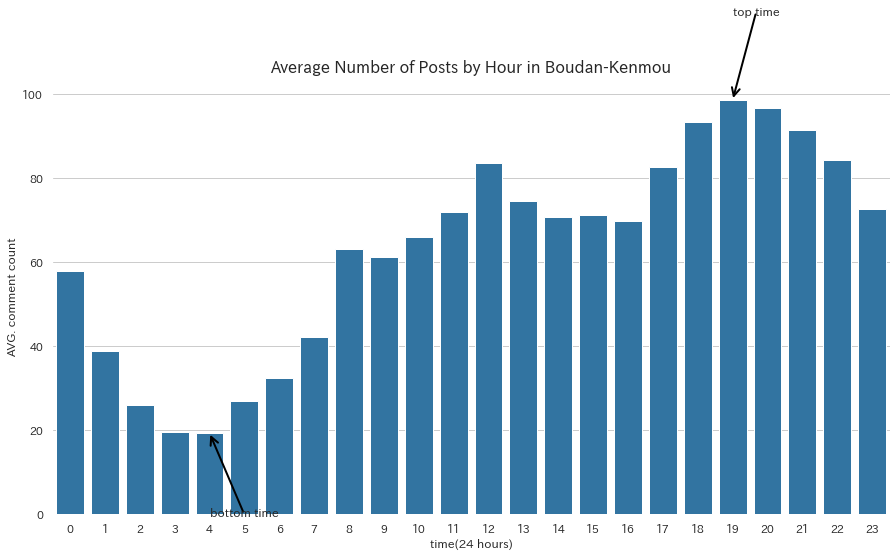

In [16]:
sql = f"select * from {hour}"
hour_count = execute_sql_query(sql)[1:]

df = pd.DataFrame(hour_count, columns=['date', 'sum_comment'])
df['hour'] = pd.to_datetime(df['date']).dt.hour
hourly_mean = df.groupby('hour')['sum_comment'].mean().reset_index()

fig, ax = plt.subplots(figsize=(15, 8))

# Use Seaborn to plot the bar chart
sns.barplot(data=hourly_mean, x='hour', y='sum_comment', color='tab:blue', ax=ax)

# Find peak and bottom time
peak_time = hourly_mean.loc[hourly_mean['sum_comment'].idxmax(), 'hour']
bottom_time = hourly_mean.loc[hourly_mean['sum_comment'].idxmin(), 'hour']

# Add annotations
ax.annotate('top time', xy=(peak_time, hourly_mean.loc[hourly_mean['hour']==peak_time, 'sum_comment']), 
            xytext=(peak_time, hourly_mean.loc[hourly_mean['hour']==peak_time, 'sum_comment']+20),
            arrowprops=dict(facecolor='none', arrowstyle='->', color='black', 
                            linewidth=2, mutation_scale=20, 
                            patchA=None, patchB=None))
ax.annotate('bottom time', xy=(bottom_time, hourly_mean.loc[hourly_mean['hour']==bottom_time, 'sum_comment']), 
            xytext=(bottom_time, hourly_mean.loc[hourly_mean['hour']==bottom_time, 'sum_comment']-20),
            arrowprops=dict(facecolor='none', arrowstyle='->', color='black', 
                            linewidth=2, mutation_scale=20, 
                            patchA=None, patchB=None))

# Set axis labels and title
ax.set_xlabel('time(24 hours)')
ax.set_ylabel('AVG. comment count')
ax.set_xticks(hourly_mean['hour'])
ax.set_title('Average Number of Posts by Hour in Boudan-Kenmou', fontsize=16)

# Adjust plot style using Seaborn
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

plt.show()

In [140]:
# Create the dataframe
data = {
    'ID': ['050URVpo', 'LQOX4zXW', '4Ipydosh', 'j/XEkAcs', 'z77O12bv',
           'BsmaJ0dl', 'S9ojenFt', 'f/N8/Nw1', 'z5l6AqW4', 'RdxGR71f'],
    '回数': [2272, 610, 597, 418, 403, 322, 320, 288, 267, 252],
    '日時': ['2022-08-25', '2022-08-27', '2022-08-04', '2022-08-19',
            '2022-08-17', '2022-08-21', '2022-08-26', '2022-08-16',
            '2022-08-27', '2022-08-19']
}
df = pd.DataFrame(data)

# Add the ranking column
df['順位'] = df['回数'].rank(ascending=False, method='dense')

# Set the index to the ranking column
df.set_index('順位', inplace=True)

# Apply the style to the dataframe
(df.style
 .set_caption('ID別書き込み回数ランキング')
 .set_properties(**{'text-align': 'center'})
 .background_gradient(subset='回数', cmap='Blues')
 .highlight_max(subset='回数', color='lightgreen')
 .highlight_min(subset='回数', color='salmon')
)

,ID,回数,日時
順位,,,
1.000000,050URVpo,2272,2022-08-25
2.000000,LQOX4zXW,610,2022-08-27
3.000000,4Ipydosh,597,2022-08-04
4.000000,j/XEkAcs,418,2022-08-19
5.000000,z77O12bv,403,2022-08-17
6.000000,BsmaJ0dl,322,2022-08-21
7.000000,S9ojenFt,320,2022-08-26
8.000000,f/N8/Nw1,288,2022-08-16
9.000000,z5l6AqW4,267,2022-08-27
